In [ ]:
import pandas as pd
df = pd.read_csv("Shoe prices.csv")
df.shape

(1006, 8)

In [ ]:
df_sepatu = pd.read_csv("Shoe prices.csv")
df_sepatu

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00
...,...,...,...,...,...,...,...,...
1001,New Balance,Fresh Foam 880v11,Running,Women,US 10,Grey,Mesh,$130.00
1002,Asics,Gel-Kayano Lite,Running,Men,US 9.5,Black,Mesh,$160.00
1003,Fila,Venom 94,Fashion,Women,US 7.5,White,Leather,$70.00
1004,Skechers,Summits,Training,Men,US 8,Grey,Mesh,$55.00


In [ ]:
df['Type'].value_counts()

,count
Type,
Running,332
Casual,243
Skate,100
Fashion,86
Lifestyle,76
Basketball,52
Walking,46
Training,34
Crossfit,11


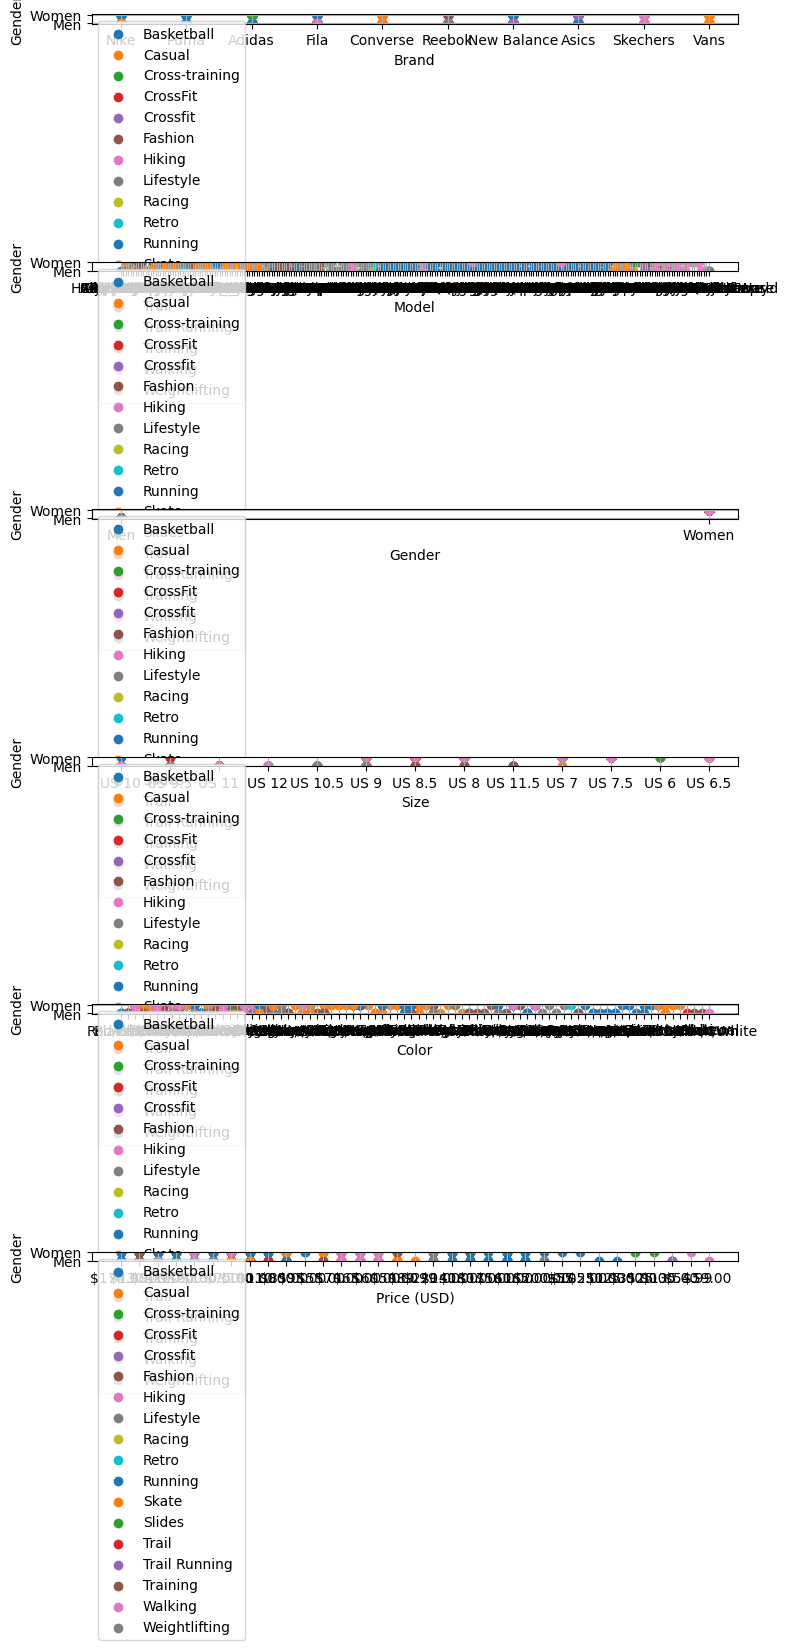

In [ ]:
from itertools import groupby
import matplotlib.pyplot as plt

fitur = ['Brand', 'Model', 'Gender', 'Size', 'Color', 'Price (USD)']

fig, axes = plt.subplots(len(fitur), 1, figsize=(8, 15)) # Membuat subplot

for i, fitur in enumerate(fitur):
    ax = axes[i]
    for OC, d in df_sepatu.groupby('Type'):
        ax.scatter(d[fitur], d['Gender'], label=OC) # Memplot terhadap 'Gender' untuk demonstrasi

    ax.set_xlabel(fitur)
    ax.set_ylabel('Gender')
    ax.legend(loc='upper left')
    ax.grid(True)

plt.tight_layout() # Menyesuaikan parameter subplot untuk tata letak yang rapat
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Diasumsikan df_sepatu adalah DataFrame Anda
categorical_features = ['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material']

# Membuat kamus untuk menyimpan LabelEncoder untuk setiap fitur/kolom
encoders = {}

# Melakukan proses encoding untuk setiap fitur/kolom kategorikal
for feature in categorical_features: # Untuk setiap kolom dalam daftar 'categorical_features':
    le = LabelEncoder() # Membuat objek LabelEncoder baru
    df_sepatu[feature] = le.fit_transform(df_sepatu[feature])  # Menerapkan encoding pada kolom tersebut
    encoders[feature] = le  # Menyimpan encoder untuk digunakan nanti

# Sekarang, df_sepatu memiliki kolom kategorikal yang sudah diubah menjadi numerik
print(df_sepatu.head()) # Menampilkan 5 baris pertama dari df_sepatu setelah encoding

# Untuk menggunakan encoder ini pada data baru:
# new_data = pd.DataFrame(...)

   Brand  Model  Type  Gender  Size  Color  Material Price (USD)
0      5     17     0       0     0     61        10    $170.00 
1      0    212    10       0    12      1        20    $180.00 
2      7     49     1       0     2     67        10     $75.00 
3      2     48     1       1     9     52         0     $55.00 
4      6    105     7       1     8     56        14     $80.00 


In [ ]:
import numpy as np

# Mengambil fitur 'Brand' dan 'Model' 'Gender' 'Size' 'Color' sebagai x_train
x_train = np.array(df_sepatu[['Brand', 'Model', 'Gender', 'Size', 'Color']])
# Mengambil fitur 'Price (USD)' sebagai y_train
y_train = np.array(df_sepatu['Type'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[  5  17   0   0  61]
 [  0 212   0  12   1]
 [  7  49   0   2  67]
 ...
 [  3 225   1   8  67]
 [  8 202   0   9  39]
 [  5  22   1   8  63]]

y_train: [ 0 10  1 ...  5 15 10]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

K = 5
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
Brand = 5
Model = 41
Size = 8
Color = 51
Material = 14

X_new = np.array([Brand, Model, Size, Color, Material,]).reshape(1, -1)
X_new

array([[ 5, 41,  8, 51, 14]])

In [ ]:
y_new = model.predict(X_new)
y_new

array([10])

In [ ]:
le.inverse_transform(y_new)

array(['10'], dtype='<U21')

In [ ]:
sepatu = np.array([Brand, Model, Size, Color, Material])
sepatu

array([ 6, 48,  5, 51, 14])

In [ ]:
x_train

array([[  5,  17,   0,   0,  61],
       [  0, 212,   0,  12,   1],
       [  7,  49,   0,   2,  67],
       ...,
       [  3, 225,   1,   8,  67],
       [  8, 202,   0,   9,  39],
       [  5,  22,   1,   8,  63]])

In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(sepatu, d) for d in x_train]
data_jarak

[76.13803254615921,
 169.25424662323837,
 72.3671196055225,
 56.92099788303083,
 82.93370846646133,
 127.00787377166819,
 65.96211033616193,
 88.76936408468859,
 69.52697318307479,
 103.12128781197411,
 67.512961718473,
 165.55965692160635,
 58.974570791146924,
 132.1060180309739,
 146.27371602581238,
 71.93747284969079,
 62.72160712226688,
 100.35437210206639,
 145.94519519326425,
 52.754146756439916,
 81.19113252073775,
 120.57362895757927,
 197.71696942852427,
 117.17081547894082,
 41.71330722922842,
 151.09599597606814,
 68.92024376045111,
 93.95211546314431,
 129.7882891481354,
 48.176757881783615,
 56.133768802744754,
 56.55086206239477,
 126.57408897558773,
 58.35237784358063,
 70.80960386840192,
 153.03921066184313,
 60.975404877704584,
 94.50396817065408,
 190.7223112276065,
 106.08487168300671,
 79.94998436522674,
 120.7890723534211,
 195.47889911701466,
 125.91663909110662,
 158.1043958908164,
 151.1257754322538,
 75.27283706623525,
 100.57335631269348,
 144.22205101855957,


In [ ]:
le.inverse_transform(y_new)

array(['10'], dtype='<U21')

In [ ]:
x_train

array([[  5,  17,   0,   0,  61],
       [  0, 212,   0,  12,   1],
       [  7,  49,   0,   2,  67],
       ...,
       [  3, 225,   1,   8,  67],
       [  8, 202,   0,   9,  39],
       [  5,  22,   1,   8,  63]])

In [ ]:
df_sepatu['jarak'] = data_jarak
df_sepatu.sort_values('jarak')

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD),jarak
830,6,43,10,0,12,12,14,$120.00,39.686270
156,6,43,10,0,12,12,14,$140.00,39.686270
910,2,47,1,0,12,10,0,$85.00,39.736633
929,2,47,1,0,12,10,0,$85.00,39.736633
911,6,43,10,1,11,19,14,$90.00,40.816663
...,...,...,...,...,...,...,...,...,...
244,0,228,5,0,11,81,20,$220.00,196.341539
825,5,235,10,1,8,56,14,$120.00,196.466282
555,5,238,10,0,0,10,14,$250.00,196.832416
22,7,232,10,0,2,67,14,$120.00,197.716969


In [ ]:
from re import X
import numpy as np
from sklearn.preprocessing import LabelEncoder

X_test = np.array([[6, 43, 12, 12, 14], [2, 47, 12, 10, 0], [6, 43, 11, 19, 14]])

# Assuming 'Type' column in df_sepatu was used to fit the LabelEncoder
le = LabelEncoder()
le.fit(df_sepatu['Type'])  # Re-fit the encoder if needed

# Ensure the labels in y_test exist in the fitted classes
# If '10' is a new label, add it to the classes:
if '10' not in le.classes_:
    le.classes_ = np.append(le.classes_, '10')

y_test = le.transform(np.array(['10', '10', '1'])).flatten()
print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}\n')

X_test:
[[ 6 43 12 12 14]
 [ 2 47 12 10  0]
 [ 6 43 11 19 14]]

y_test:
[18 18  1]



In [ ]:
y_pred = model.predict(X_test)
y_pred

array([10,  1, 10])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.0


In [ ]:
from sklearn.metrics import precision_score # Mengimpor fungsi precision_score dari scikit-learn untuk menghitung presisi

# Menentukan parameter 'average' dengan nilai yang sesuai untuk klasifikasi multikelas
prec = precision_score(y_test, y_pred, average='weighted')  # atau 'micro', 'macro', None
print(f'Presisi: {prec}') # Menampilkan skor presisi

Presisi: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import recall_score

# Specify the 'average' parameter with a suitable value for multiclass classification
rec = recall_score(y_test, y_pred, average='weighted')  # or 'micro', 'macro', None
print(f'Recall: {rec}')

Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report # Mengimpor fungsi classification_report dari scikit-learn

cls_report = classification_report(y_test, y_pred) # Menghasilkan classification report
print(f'Classification Report:\n{cls_report}') # Menampilkan classification report

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          18       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.metrics import matthews_corrcoef # Mengimpor fungsi matthews_corrcoef dari scikit-learn

mcc = matthews_corrcoef(y_test, y_pred) # Menghitung MCC
print(f'MCC: {mcc}') # Menampilkan nilai MCC

MCC: -0.25
